In [2]:
library(data.table,quietly = T)
library(matrixStats)
library(ggpubr)
library(gplots)
library(RColorBrewer)
library(dplyr)

# Correlations between blood-brain in hm450k probes

# Using data from:

### Interindividual methylomic variation across blood, cortex, and cerebellum: implications for epigenetic studies of neurological and neuropsychiatric phenotypes
Eilis Hannon Katie Lunnon Leonard Schalkwyk and Jonathan Mill

In [3]:
blood_brain_data <- fread("./GEO/GSE59685_betas.csv",header=T,skip = 6,sep = ",")
hm450k_probset <- blood_brain_data$V1
data_def <- read.table("./GEO/GSE59685_series_matrix_sample_Id.csv",sep = ",",header = T,stringsAsFactors = F)
number_of_cell_types <- data.frame(table(data_def$ind_id))
number_of_cell_types <- number_of_cell_types[number_of_cell_types$Freq==5,]
data_def <- subset(data_def, ind_id %in% number_of_cell_types$Var1)
blood_brain_data <- blood_brain_data[, c("V1",as.character(data_def$ID)), with=FALSE]
colnames(blood_brain_data) <- c("V1",as.character(data_def$tissue_type_ind))
blood_brain_data <- as.data.frame(blood_brain_data)
blood_brain_data <- cbind(blood_brain_data[ , grepl( "blood" , names( blood_brain_data ) ) ],
    blood_brain_data[ , grepl( "cerebellum" , names( blood_brain_data ) ) ],
      blood_brain_data[ , grepl( "superior" , names( blood_brain_data ) ) ],
      blood_brain_data[ , grepl( "frontal" , names( blood_brain_data ) ) ],
      blood_brain_data[ , grepl( "entorhinal" , names( blood_brain_data ) ) ])

blood_brain_data$V1 <- hm450k_probset

temp <- blood_brain_data[ , grepl( "blood" , names( blood_brain_data ) ) ]
temp$V1 <- hm450k_probset

get_cor <- function (row){
    # Calculate correlation accross the 5 tissues (Blood vs the 4 brain regions)
    return(c(
        cor(as.numeric(row[1:67]),as.numeric(row[68:134])),
        cor(as.numeric(row[1:67]),as.numeric(row[135:201])),
        cor(as.numeric(row[1:67]),as.numeric(row[202:268])),
        cor(as.numeric(row[1:67]),as.numeric(row[269:335]))
        ))
    }

blood_brain_corrlations <- data.frame(t(apply(blood_brain_data,1,get_cor)))

blood_brain_corrlations$probe_id <- hm450k_probset

colnames(blood_brain_corrlations) <- c("Blood vs CER","Blood vs STG", "Blood vs PFC", "Blood vs EC","probe_id" )

,Blood vs CER,Blood vs STG,Blood vs PFC,Blood vs EC,probe_id
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,-0.073186459,0.262599049,0.12799260,0.099451032,cg00000029
2,0.055851905,-0.041051310,0.23034075,-0.056085915,cg00000108
3,0.122785502,0.004476646,-0.24879321,0.056156560,cg00000109
4,-0.007058383,0.008951031,0.10807548,0.090457673,cg00000165
5,-0.193015496,0.058928034,0.01987722,-0.003483488,cg00000236
6,-0.031787085,0.018381017,-0.14803153,0.133296468,cg00000289


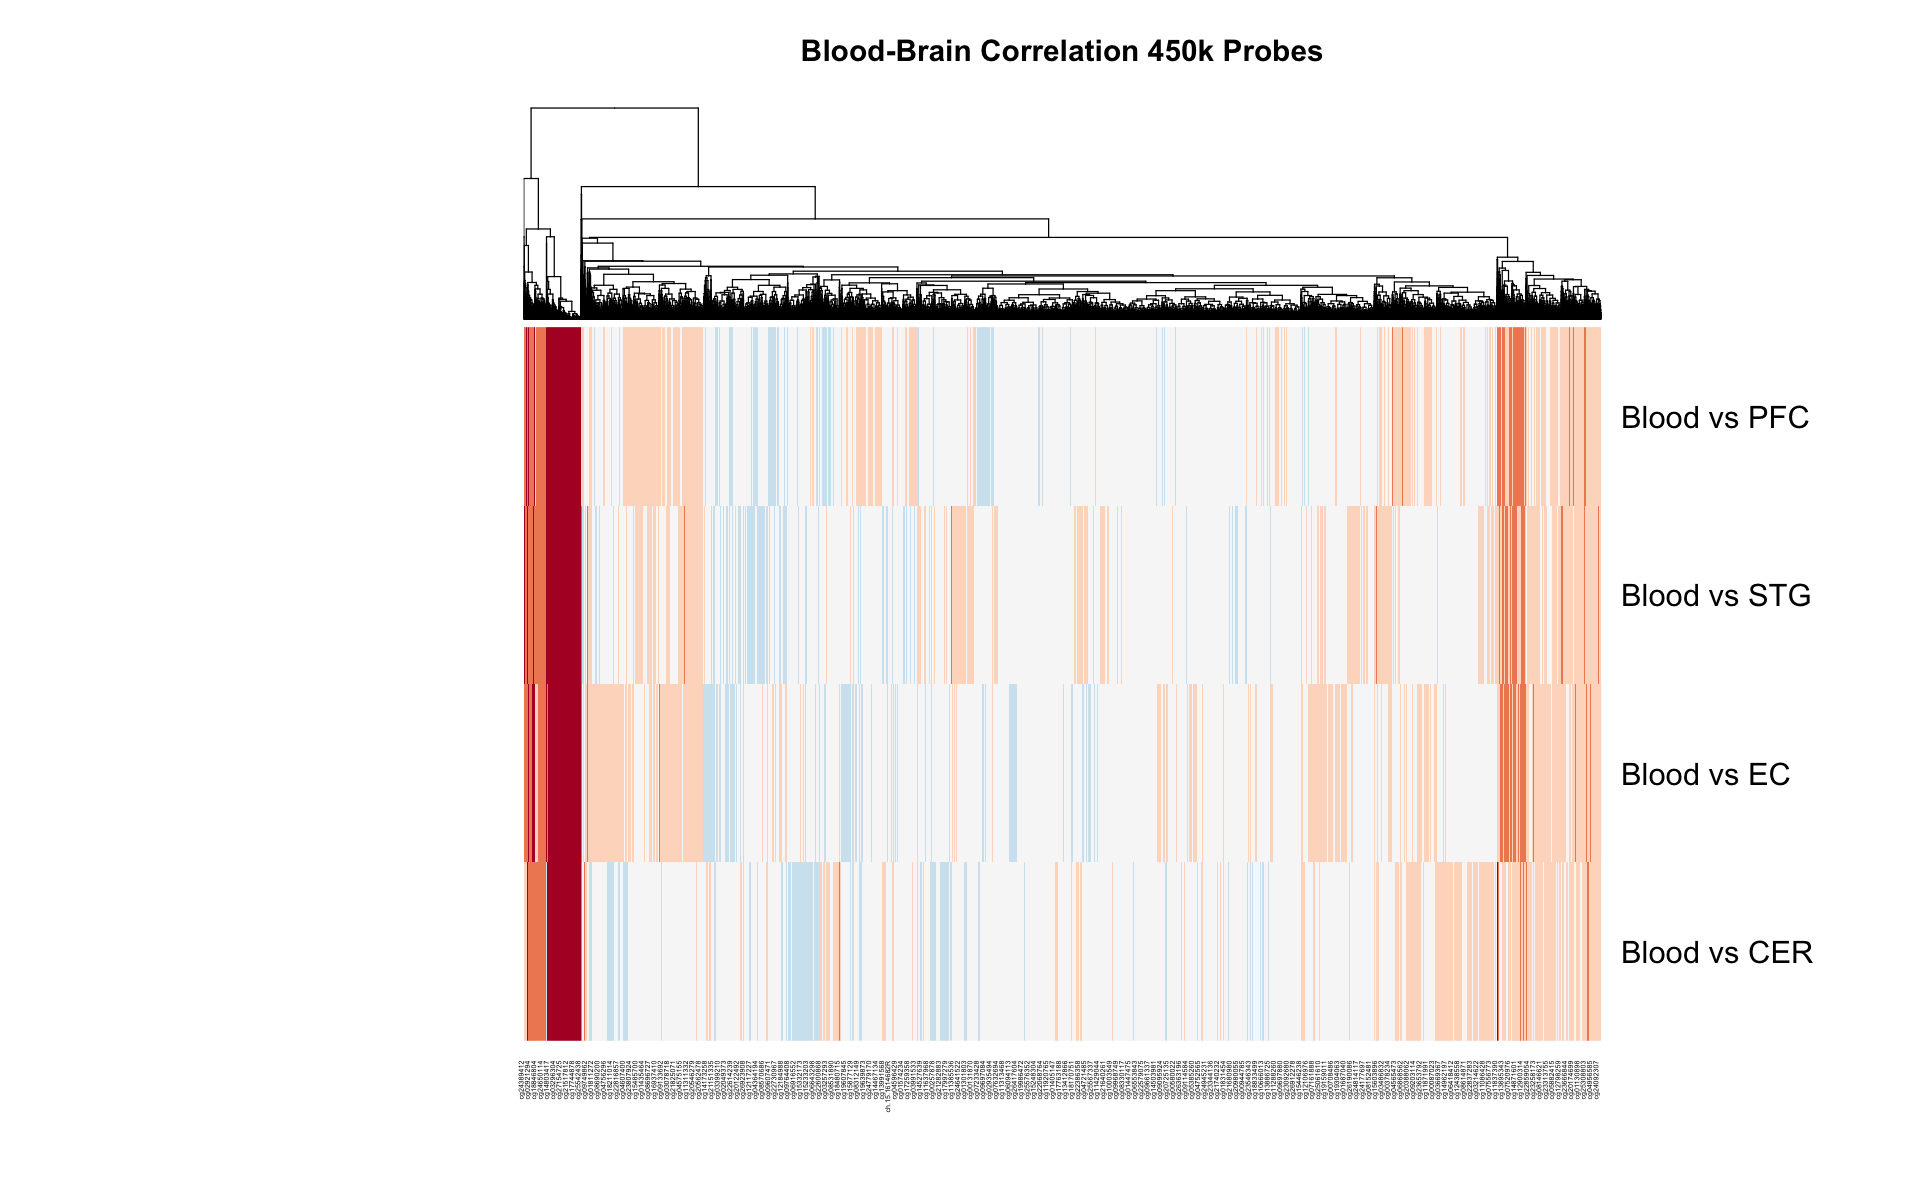

In [5]:
head(blood_brain_corrlations)
data <- sample_n(blood_brain_corrlations,30000,replace = F)
rownames(data) <- data$probe_id
data$probe_id <- NULL
options(repr.plot.width=16, repr.plot.height=10)
heatmap.2(as.matrix(t(data)),col=rev(brewer.pal(7,"RdBu")),main = "Blood-Brain Correlation 450k Probes",
          trace="none",margins = c(8, 16),
          distfun = function(x) dist(x, method="manhattan"),
          hclustfun = function(x) hclust(x,method="average"),scale="none",key = FALSE,dendrogram='column')

Only a small propotion of hm450k probes show consistant blood-brain correlation.

# Blood-Brain Correlation in CoRSIV probes

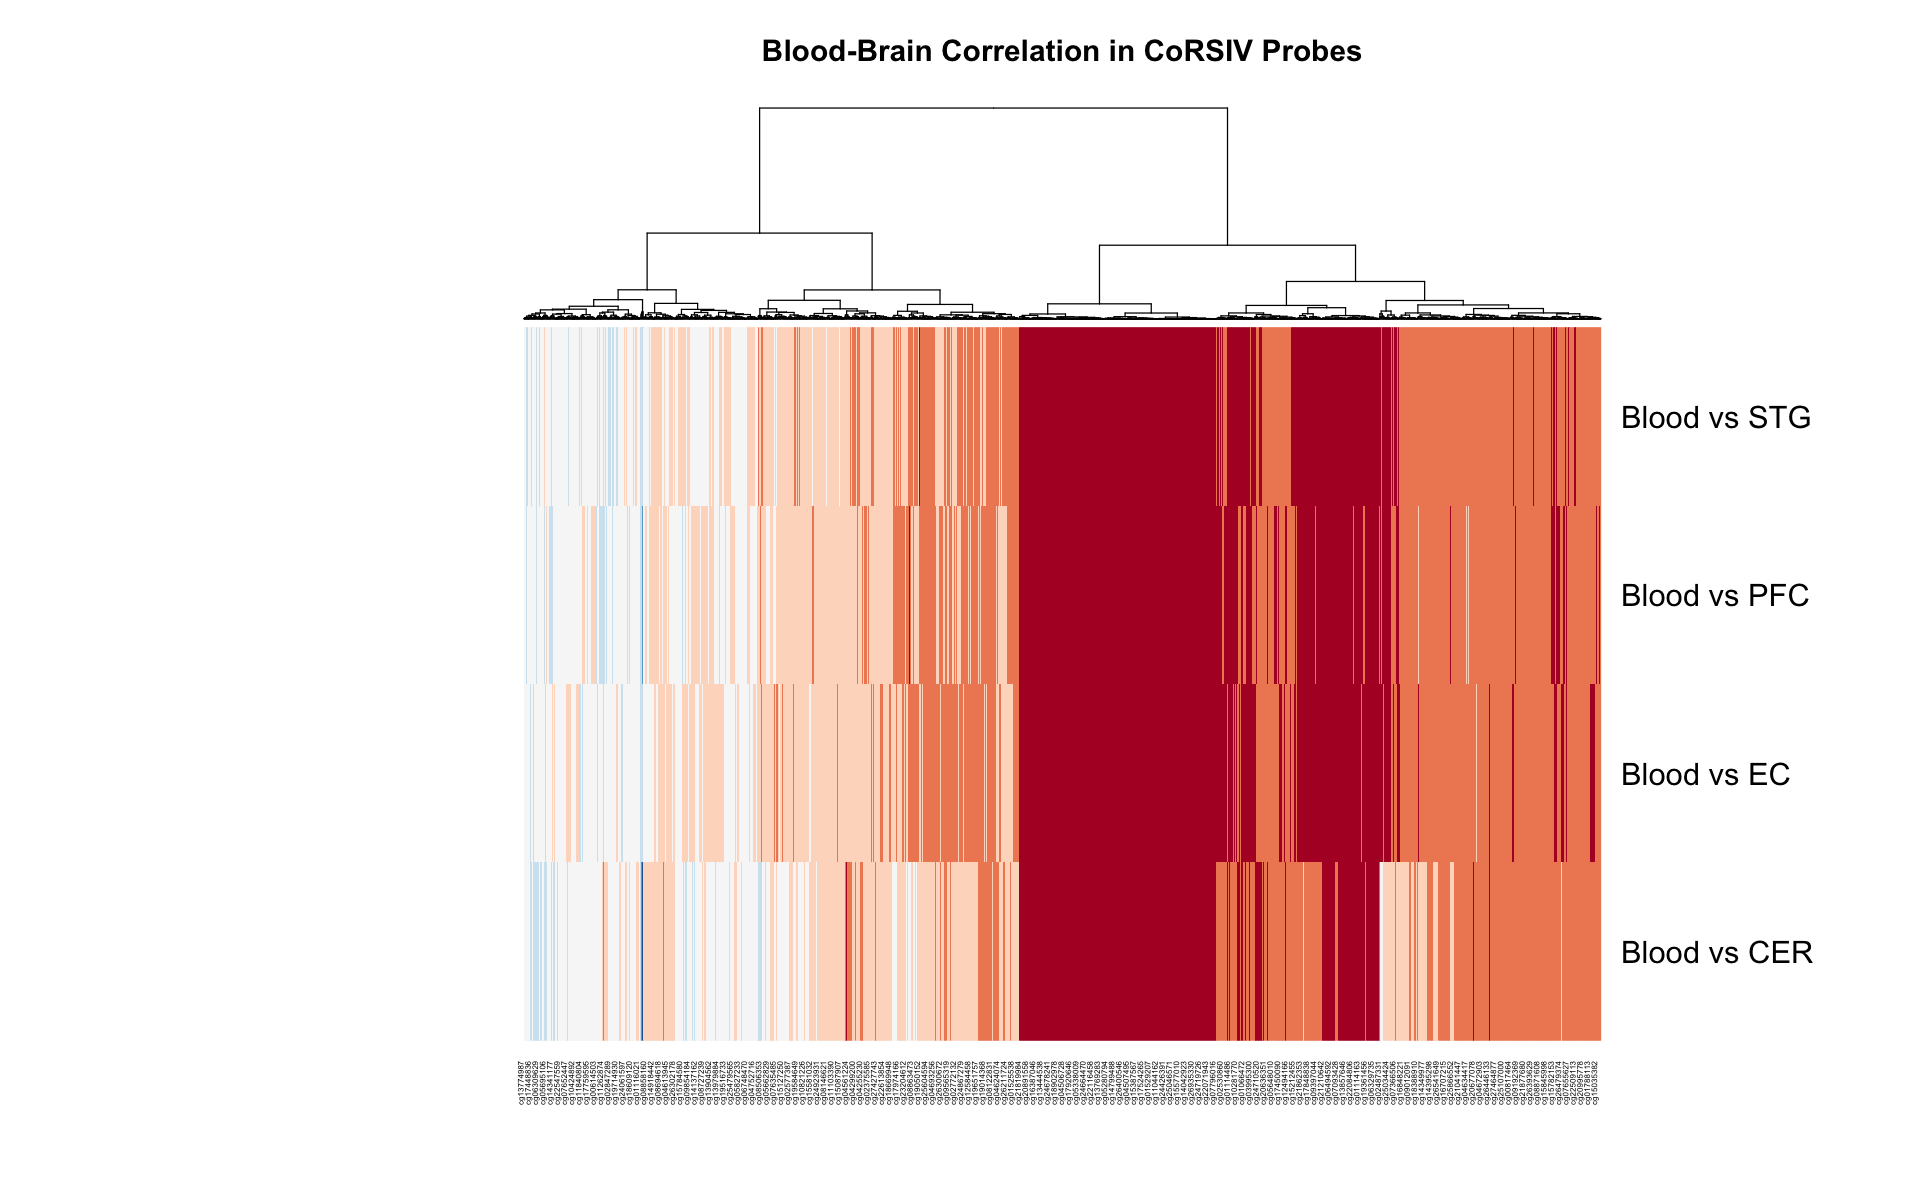

In [10]:
CoRSIV_probes <- read.csv("./hm450k_probes/CoRSIV_ESS_SIV_CG_sites_clusters_hg38.csv") # CpG sites overlapping CoRSIV regions
CoRSIV_probes <- unique(CoRSIV_probes$CG)
data <- subset(blood_brain_corrlations,probe_id %in% CoRSIV_probes)
rownames(data) <- data$probe_id
data$probe_id <- NULL
options(repr.plot.width=16, repr.plot.height=10)
heatmap.2(as.matrix(t(data)),col=rev(brewer.pal(7,"RdBu")),main = "Blood-Brain Correlation in CoRSIV Probes",
          trace="none",margins = c(8, 16),
          distfun = function(x) dist(x, method="euclidian"),
          hclustfun = function(x) hclust(x,method="ward.D2"),scale="none",key=FALSE,dendrogram='column'
)

We focused on HM450k probes that are known to be systemic by previous work.